<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning-Notes/blob/main/Gradient_Descent_in_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent in Neural Networks:

Gradient Descent is the core optimization algorithm used in deep learning to minimize the loss function by updating the model's weights.

## What is Gradient Descent?

Gradient Descent is an iterative algorithm that adjusts the weights of a neural network to minimize the loss function. It computes the gradient (partial derivatives) of the loss function with respect to the weights and moves in the opposite direction of the gradient to reduce the error.

## How Gradient Descent Works in Deep Learning

1. **Initialize Weights**: All weights are initialized randomly (or using a chosen initialization method).

2. **Forward Propagation**:
   - Input data passes through the layers of the neural network.
   - Each layer performs a linear transformation followed by a non-linear activation function.
   - The final output is the network's prediction.

3. **Loss Calculation**:
   - The prediction is compared to the true label using a loss function (e.g., Mean Squared Error or Cross Entropy).

4. **Backpropagation**:
   - Compute gradients of the loss with respect to each weight using the chain rule.
   - Gradients are propagated from the output layer back to the input layer.

5. **Weight Update**:
   - Weights are updated using the formula:
     ```
     w := w - η * ∂L/∂w
     ```
     where:
     - `w` is the weight,
     - `η` is the learning rate,
     - `∂L/∂w` is the gradient of the loss with respect to the weight.

6. **Repeat**:
   - Repeat the forward and backward passes for multiple iterations (epochs) until convergence.

## Variants of Gradient Descent

- **Batch Gradient Descent**: Uses the entire dataset to compute gradients.
- **Stochastic Gradient Descent (SGD)**: Uses one sample at a time.
- **Mini-batch Gradient Descent**: Uses a small subset (batch) of the dataset.

## Common Optimizers in Deep Learning

- **SGD**: Stochastic Gradient Descent, simple but can be noisy.
- **Momentum**: Accelerates SGD by using past gradients.
- **RMSProp**: Scales learning rates based on recent magnitudes of gradients.
- **Adam**: Combines Momentum and RMSProp; widely used for deep learning.

## Challenges

- Vanishing or exploding gradients in deep networks.
- Local minima and saddle points.
- Choosing the right learning rate.
- Overfitting if the model is too complex for the data.

Gradient Descent is the foundation of training neural networks and is used in all types of deep learning architectures such as CNNs, RNNs, and Transformers.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [4]:
X = torch.randn(1000, 10)        # 1000 samples, 10 features
y = torch.randint(0, 2, (1000,)) # Binary classification (labels: 0 or 1)

In [5]:
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [6]:
# Define a simple feedforward neural network
model = nn.Sequential(
    nn.Linear(10, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

In [7]:
# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [8]:
# Training loop
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    for inputs, labels in dataloader:
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")


Epoch 1/10, Loss: 22.5032
Epoch 2/10, Loss: 22.1877
Epoch 3/10, Loss: 22.0628
Epoch 4/10, Loss: 22.0339
Epoch 5/10, Loss: 21.8763
Epoch 6/10, Loss: 21.8216
Epoch 7/10, Loss: 21.7162
Epoch 8/10, Loss: 21.7418
Epoch 9/10, Loss: 21.7053
Epoch 10/10, Loss: 21.6348




---

# Batch vs Stochastics vs Mini Batch:

---



| Type              | batch_size | Characteristics                           |
| ----------------- | ------------ | ----------------------------------------- |
| **Batch GD**      | Full dataset | Stable updates, slow computation          |
| **Stochastic GD** | 1            | Noisy updates, fast per-step but unstable |
| **Mini-Batch GD** | 16           | Balanced: faster and more stable          |


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [11]:
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(int)

In [12]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Function to build a simple model
def create_model():
    model = Sequential([
        Dense(10, activation='relu', input_dim=2),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
    return model

In [15]:
# ----------- Batch Gradient Descent ------------
batch_model = create_model()
batch_history = batch_model.fit(
    X_scaled, y,
    epochs=50,
    batch_size=len(X_scaled),  # entire dataset at once
    verbose=0,
    validation_split=0.2
)

In [16]:
# ----------- Stochastic Gradient Descent (SGD) ------------
sgd_model = create_model()
sgd_history = sgd_model.fit(
    X_scaled, y,
    epochs=50,
    batch_size=1,  # one sample at a time
    verbose=0,
    validation_split=0.2
)

In [17]:
# ----------- Mini-Batch Gradient Descent ------------
mini_batch_model = create_model()
mini_batch_history = mini_batch_model.fit(
    X_scaled, y,
    epochs=50,
    batch_size=16,  # small batches
    verbose=0,
    validation_split=0.2
)

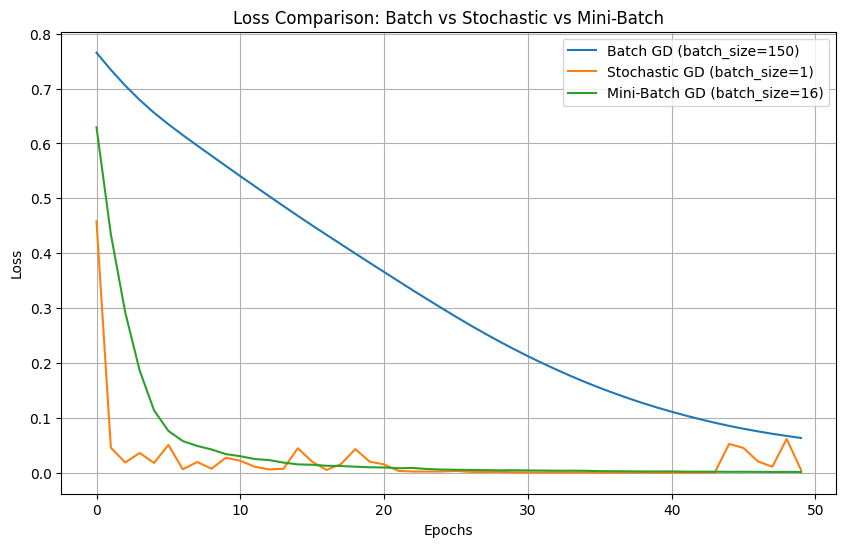

In [18]:
# ----------- Plot Comparison ------------
plt.figure(figsize=(10, 6))
plt.plot(batch_history.history['loss'], label='Batch GD (batch_size=150)')
plt.plot(sgd_history.history['loss'], label='Stochastic GD (batch_size=1)')
plt.plot(mini_batch_history.history['loss'], label='Mini-Batch GD (batch_size=16)')

plt.title('Loss Comparison: Batch vs Stochastic vs Mini-Batch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()